# Exercise

At the same level as this notebook on github, there is an Exercise folder that contains carprices.csv.
This file has car sell prices for 3 different models. First plot data points on a scatter plot chart
to see if linear regression model can be applied. If yes, then build a model that can answer
following questions,

**1) Predict price of a mercedez benz that is 4 yr old with mileage 45000**

**2) Predict price of a BMW X5 that is 7 yr old with mileage 86000**

**3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())**

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [2]:
df = pd.read_csv('carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


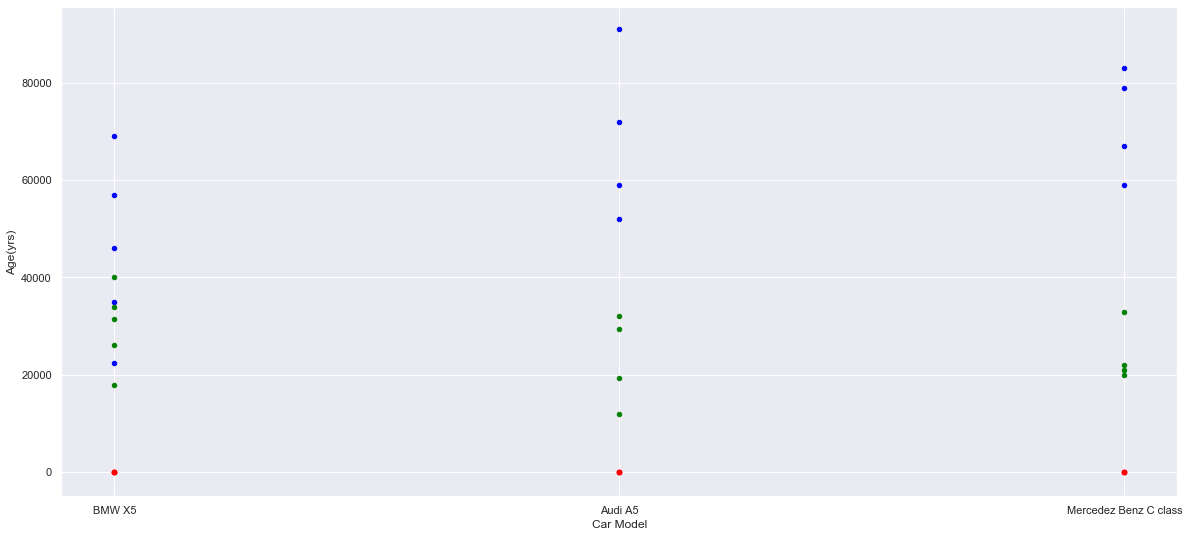

In [20]:
fig, ax = plt.subplots(figsize=(20,9))
df.plot.scatter(x='Car Model', y='Mileage', c='blue', ax=ax);
df.plot.scatter(x='Car Model', y='Sell Price($)', c='green', ax=ax);
df.plot.scatter(x='Car Model', y='Age(yrs)', c='red', ax=ax);
# ax.grid(False)

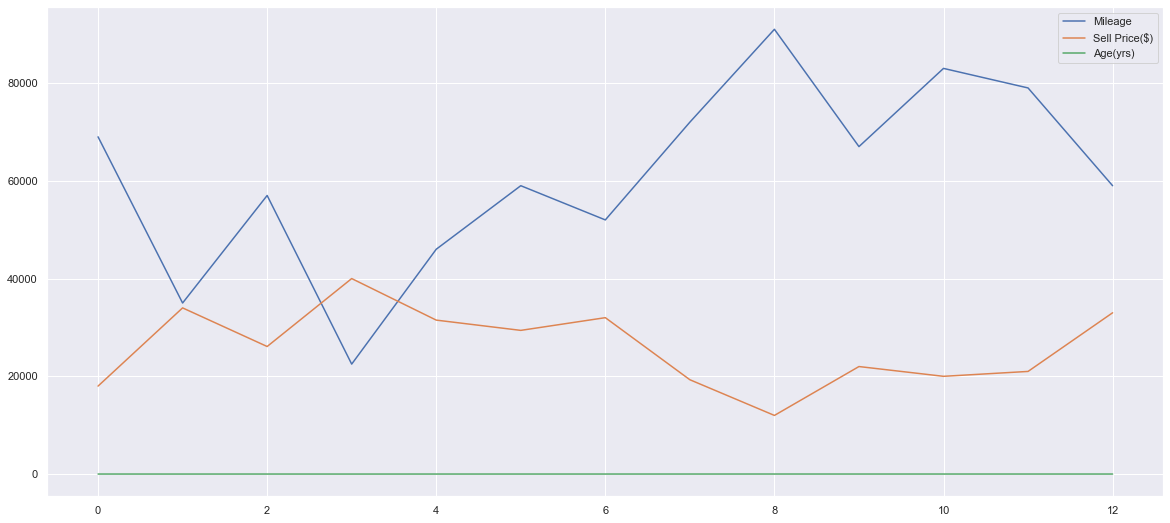

In [22]:
fig, ax = plt.subplots(figsize=(20,9))
df.plot(ax=ax);

# Using pandas to create dummy variables

In [29]:
dummies = pd.get_dummies(df['Car Model'])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [30]:
merged = pd.concat([df,dummies],axis='columns')
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


### Dummy Variable Trap

In [31]:
final = merged.drop(["Car Model", "Audi A5"],axis='columns')
final

,Mileage,Sell Price($),Age(yrs),BMW X5,Mercedez Benz C class
0,69000,18000,6,1,0
1,35000,34000,3,1,0
2,57000,26100,5,1,0
3,22500,40000,2,1,0
4,46000,31500,4,1,0
5,59000,29400,5,0,0
6,52000,32000,5,0,0
7,72000,19300,6,0,0
8,91000,12000,8,0,0
9,67000,22000,6,0,1


In [37]:
X = final.drop('Sell Price($)', axis='columns')
X

,Mileage,Age(yrs),BMW X5,Mercedez Benz C class
0,69000,6,1,0
1,35000,3,1,0
2,57000,5,1,0
3,22500,2,1,0
4,46000,4,1,0
5,59000,5,0,0
6,52000,5,0,0
7,72000,6,0,0
8,91000,8,0,0
9,67000,6,0,1


In [38]:
y = final['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

## Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [40]:
model.fit(X,y)

LinearRegression()

In [41]:
model.predict(X)

array([18705.2723644 , 35286.78445645, 24479.19112468, 41245.76426391,
       29882.98779056, 28023.6135243 , 30614.46818502, 21879.57266964,
       12182.34562104, 26183.72387884, 18929.31674102, 20409.80511857,
       30477.15426156])

In [42]:
model.score(X,y)

0.9417050937281082

## Predictions

**1) Predict price of a mercedez benz that is 4 yr old with mileage 45000**

In [46]:
model.predict( [[45000,4,0,1]] )

array([36991.31721061])

**2) Predict price of a BMW X5 that is 7 yr old with mileage 86000**

In [47]:
model.predict( [[86000,7,1,1]] )

array([13534.28386945])

**3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())**

In [48]:
model.score(X,y)

0.9417050937281082